# Library yg dipakai

In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil data dari csv

In [232]:
train_data = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [233]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


# Memvisualisasi data 

In [234]:
df_num = train_data[["Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]]
df_cat = train_data[["Survived", "Sex"]]

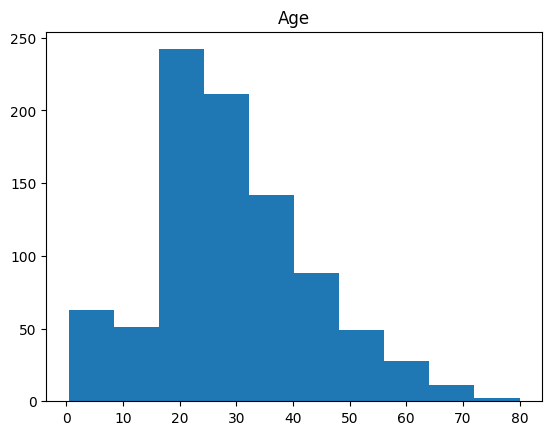

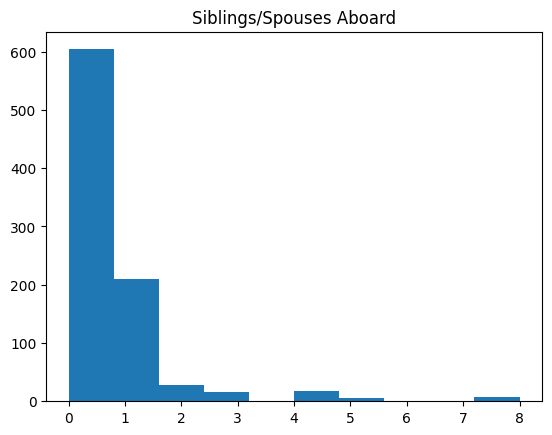

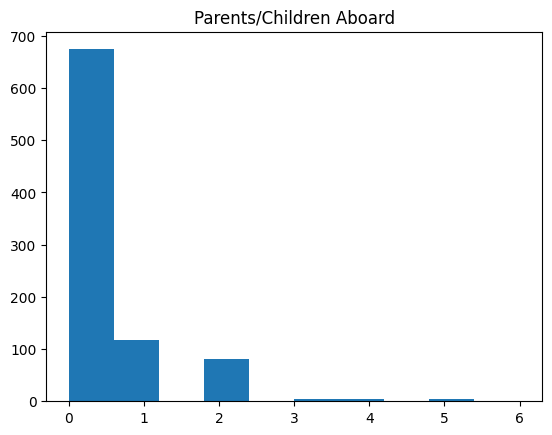

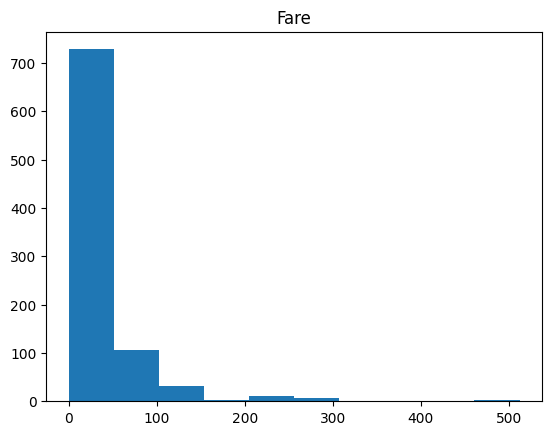

In [235]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

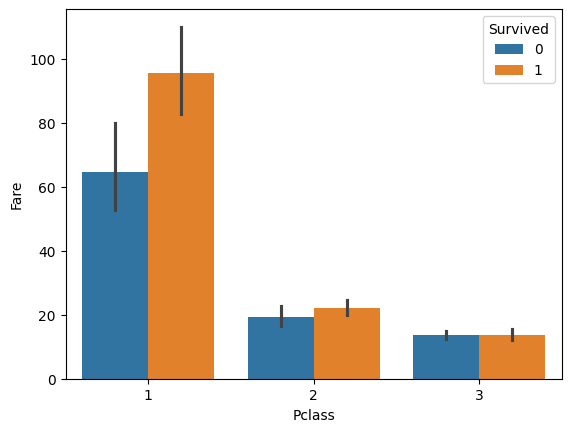

In [236]:
sns.barplot(data=train_data, x="Pclass", y="Fare", hue="Survived")

In [237]:
pd.pivot_table(train_data, index="Survived", values=["Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"])

,Age,Fare,Parents/Children Aboard,Siblings/Spouses Aboard
Survived,,,,
0,30.138532,22.208584,0.332110,0.557798
1,28.408392,48.395408,0.464912,0.473684


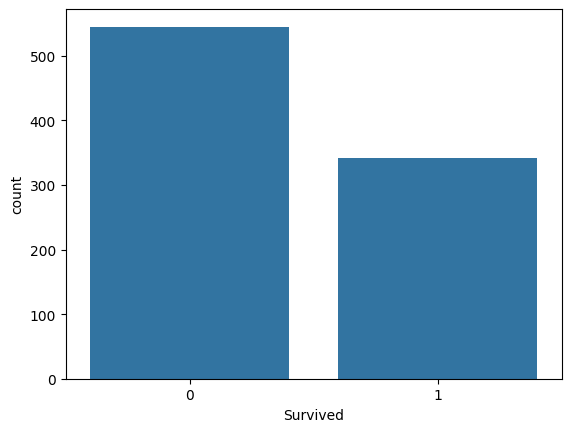

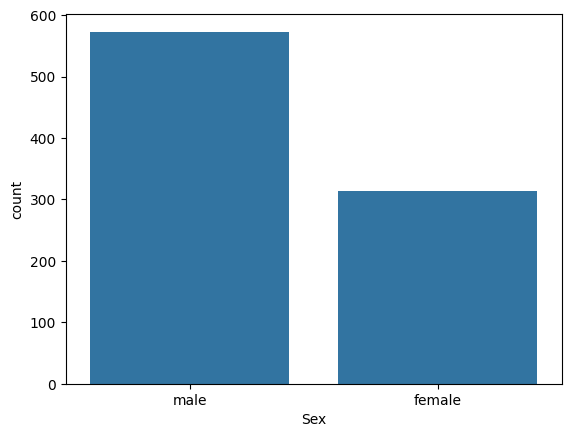

In [238]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

# Cek apakah ada data kosong

In [239]:
train_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

# Buang kolom nama karena tidak digunakan untuk prediction model

In [240]:
train_data = train_data.drop(columns=["Name"])

In [241]:
train_data.isnull().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [242]:
train_data["Fare"] = np.log(train_data["Fare"] + 1)

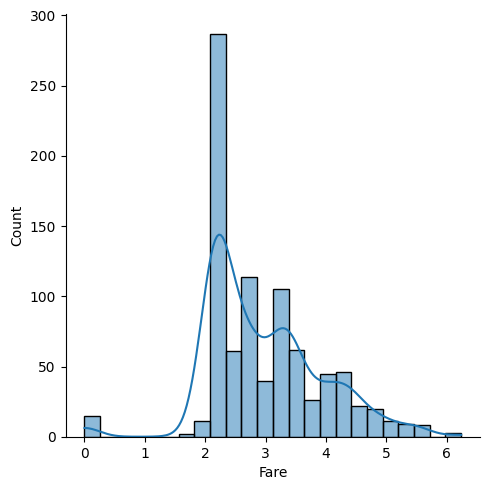

In [243]:
sns.displot(train_data["Fare"], kde=True)

<Axes: >

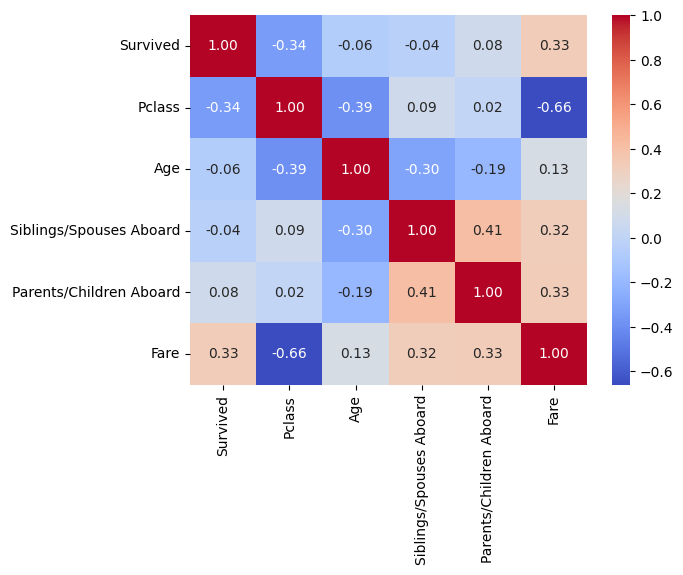

In [244]:
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [245]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Fare"]
le = LabelEncoder()
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

train_data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,18
1,1,1,0,38.0,1,0,207
2,1,3,0,26.0,0,0,41
3,1,1,0,35.0,1,0,189
4,0,3,1,35.0,0,0,43


In [246]:
X = train_data.drop(columns=["Survived"], axis=1)
y = train_data["Survived"]
train_data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,18
1,1,1,0,38.0,1,0,207
2,1,3,0,26.0,0,0,41
3,1,1,0,35.0,1,0,189
4,0,3,1,35.0,0,0,43
...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,85
883,1,1,0,19.0,0,0,153
884,0,3,0,7.0,1,2,131
885,1,1,1,26.0,0,0,153


# Membuat parameter metode classification untuk prediction model

In [247]:
from sklearn.model_selection import train_test_split, cross_val_score


def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV SCORE :", np.mean(score))

# Pengunaan algoritma machine learning sperti decision tree, dll.

In [248]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7747747747747747
CV SCORE : 0.7734526756808228


In [249]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)

Accuracy 0.8063063063063063
CV SCORE : 0.8106519393131467


In [250]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model)

Accuracy 0.7972972972972973
CV SCORE : 0.7836094712118327


In [251]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy 0.7657657657657657
CV SCORE : 0.7936900907763601


In [252]:
X_test = test.drop(columns=["Name"], axis=1)

X_test

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
403,2,male,34.0,1,0,21.0000
404,3,male,51.0,0,0,7.7500
405,2,male,3.0,1,1,18.7500
406,3,male,21.0,0,0,7.7750


# Membuat prediction model dengan parameter jenis kelamin dan tarif

In [253]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Fare"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,11
1,1,0,38.0,1,0,137
2,3,0,26.0,0,0,25
3,1,0,35.0,1,0,124
4,3,1,35.0,0,0,27


In [254]:
X_test.isnull().sum()

Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [255]:
X_test = test.drop(columns=["Name"], axis=1)

X_test.isnull().sum()

from sklearn.preprocessing import LabelEncoder

cols = ["Sex","Fare"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()
X_test

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,11
1,1,0,38.0,1,0,137
2,3,0,26.0,0,0,25
3,1,0,35.0,1,0,124
4,3,1,35.0,0,0,27
...,...,...,...,...,...,...
403,2,1,34.0,1,0,79
404,3,1,51.0,0,0,17
405,2,1,3.0,1,1,72
406,3,1,21.0,0,0,18


# Testing model

In [256]:
pred = model.predict(X_test)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

# Data sebelum testing

In [257]:
submit = pd.read_csv("before.csv")
submit

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
403,0,2,Mr. Shadrach Gale,male,34.0,1,0,21.0000
404,0,3,Mr. Carl/Charles Peter Widegren,male,51.0,0,0,7.7500
405,1,2,Master. William Rowe Richards,male,3.0,1,1,18.7500
406,0,3,Mr. Hans Martin Monsen Birkeland,male,21.0,0,0,7.7750


# Data setelah testing

In [258]:
submit["Survived"] = pred

submit

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
403,0,2,Mr. Shadrach Gale,male,34.0,1,0,21.0000
404,0,3,Mr. Carl/Charles Peter Widegren,male,51.0,0,0,7.7500
405,0,2,Master. William Rowe Richards,male,3.0,1,1,18.7500
406,0,3,Mr. Hans Martin Monsen Birkeland,male,21.0,0,0,7.7750


# Print hasil ke file csv

In [259]:
submit.to_csv("result.csv", index=False)